In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from bubbly.bubbly import bubbleplot 

In [44]:
pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5428 sha256=dc3d2aa3f6d37a08268bccf93a34a74aa67486f31ba5c6f7a24dea244593759d
  Stored in directory: /Users/boshrafahad/Library/Caches/pip/wheels/b5/4a/53/7234ca75eea014cea6a7093adc822c77b40ba13de20c6f5d0a
Successfully built bubbly
Note: you may need to restart the kernel to use updated packages.


In [74]:
# Import Dataset 

df = pd.read_csv('~/Desktop/Capstone Project/saudi_projects_v02.csv')
df.head()

,Unnamed: 0,sectors,sector_budgets,type_project,budget_project,startday_project,start_year,start_month,enddate_project,end_year,end_month,duration_project,project_area,region_project,status_project
0,0,Commercial,1058790791316,Commercial,3.350000e+08,2019-07-03,2019.0,7.0,2021-12-31,2021.0,12.0,912.0,7752.0,ALDAMMAM,Under the construction
1,1,Commercial,1058790791316,"Commercial, Residential",NaN,2010-01-01,2010.0,1.0,NaN,NaN,NaN,NaN,8000.0,RIYADH,Under the construction
2,2,Commercial,1058790791316,"Commercial, Residential",1.178000e+09,2009-01-01,2009.0,1.0,2014-12-31,2014.0,12.0,2190.0,19500.0,RIYADH,Complete
3,3,Commercial,1058790791316,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19888.0,ALHASSA,Announced
4,4,Commercial,1058790791316,"Hotel, Commercial",1.200000e+08,2019-06-01,2019.0,6.0,2022-03-31,2022.0,3.0,1034.0,3651.0,JEDDAH,Under the construction


In [124]:
df['region_project'].unique()

array(['ALDAMMAM', 'RIYADH', 'ALHASSA', 'JEDDAH', 'ALTAIF',
       'KING ABDULLAH CITY', 'ABHA', 'NAJRAN', 'MECCA', 'ALKHOBAR',
       'BRAIDAH', 'BISHA', 'BALJURASHI', 'JAZAN', 'SHARMA', 'MEDINA',
       'QIDDIYA', 'AL-JUBAIL', 'ALBAHA', 'UNAYZAH', 'ARAR',
       'WAAD ALSHAMAL', 'AD DIRIYAH', 'ALJUBAIL', 'HAIL', nan,
       'ALMUZAHMIYA', 'ARRASS', 'SDAIR', 'منطقة القصيم, البكيرية',
       'TABUK', 'ALDHAHRAN', 'ALKHARJ', 'Al QUWAIIYAH', 'TABUK, DHUBA',
       'YANBAA', 'MECCA, TAIF', 'LAYLA', 'TABUK, أملج',
       'ASEER, KAHMIS MUSHAIT', 'SHAQRA', 'ALMUJMAA', 'TUBARJAL',
       'Dumah Al Jandal', 'HAFAR ALBATIN', 'THUWAL', 'ALULA',
       'ALQURAYYAT', 'FEIFAA', 'BAHRAH', 'SAKAKA', 'ALKHAFJI', 'RABIGH',
       'MECCA, ALMUZAHMIYA, ALJMUM, ALBARABIR, RIYADH, JEDDAH',
       'ALGHAZALA', 'ALJAZAN', 'Al QUNFUDHAH',
       'JEDDAH, SHUABAH, ALLAIT, FAISALIYA, JAZAN, MECCA',
       'ALJUBAIL, RIYADH, ALQASEEM', 'ALQASEEM, MECCA', 'ALJUMUM',
       'JEDDAH, RIYADH, ALDAMAM, MUHAYIL ASEER

In [125]:
df['region_project'] = df['region_project'].str.replace('منطقة القصيم, البكيرية','ALBAKIRIA')

In [126]:
df['region_project'] = df['region_project'].str.replace('TABUK, أملج','TABUK, AMLAJ')

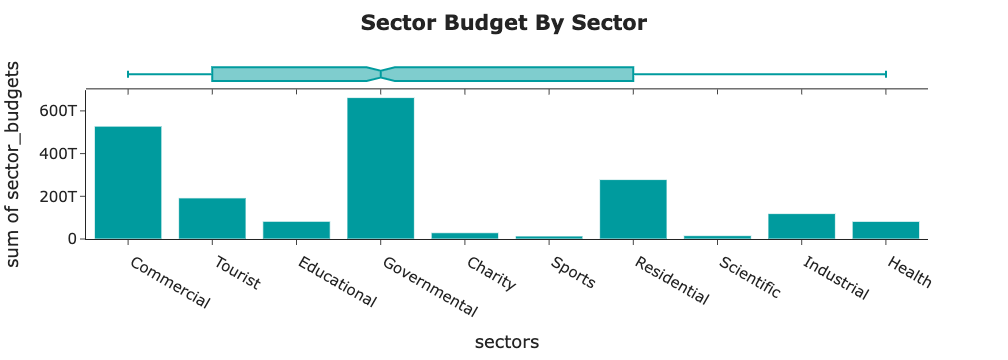

In [75]:
# 1-Interactive Plot ( histogram ) : Plot Histrogram of Sector Budget By Sector

fig = px.histogram(df, x="sectors",y="sector_budgets", marginal="box",template ="simple_white",
                   color_discrete_sequence = px.colors.diverging.Tropic)

fig.update_layout(title_text="<b> Sector Budget By Sector </b>",
                  title_x=0.5,
                  font_size=15)

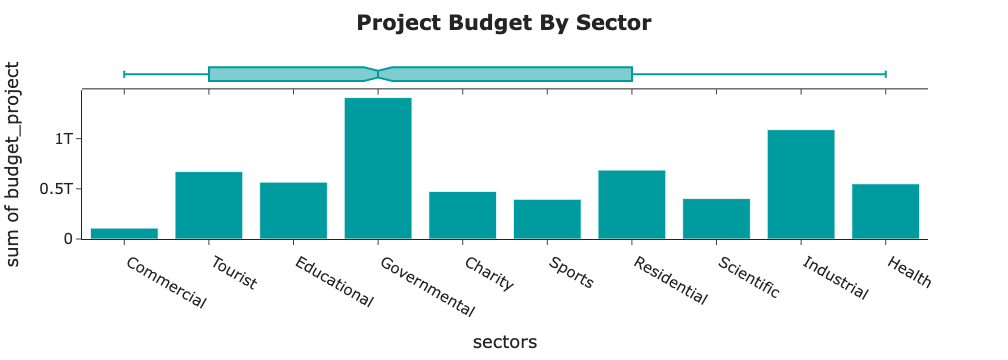

In [76]:
# 2-Interactive Plot ( histogram ) : Plot Histrogram of Project Budget By Sector

fig = px.histogram(df, x="sectors",y="budget_project", marginal="box",template ="simple_white",
                   color_discrete_sequence = px.colors.diverging.Tropic)

fig.update_layout(title_text="<b> Project Budget By Sector </b>",
                  title_x=0.5,
                  font_size=15)

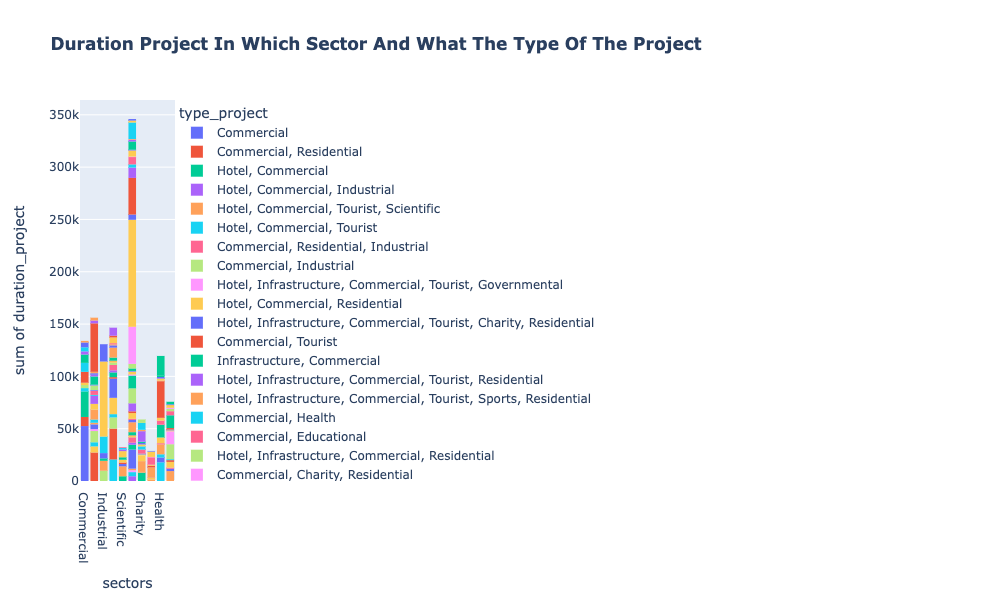

In [104]:
# 3- Interactive Plot (Stacked Bar) shows Duration Project Of Each Sector and what the Type of the Project 

px.histogram(
    data_frame = df, # data
    x = "sectors", # x value
    y = "duration_project", # y value
    color = "type_project", # Assign Color Marks 
    width=1700, height=600,
    title = "<b>Duration Project In Which Sector And What The Type Of The Project</b>"
    )

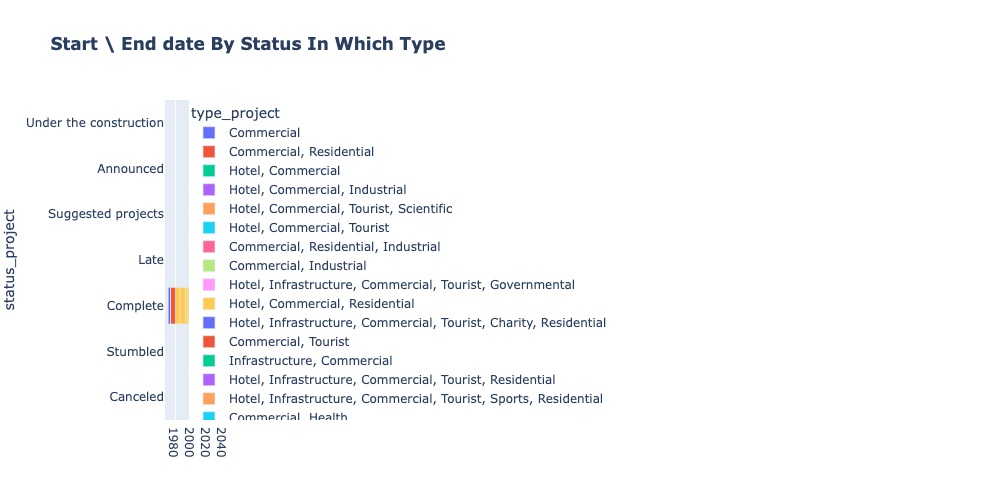

In [80]:
# 4- Interactive Plot (Timelines) shows Project Status by Start, End date and The type Of Project

fig = px.timeline(df, x_start="startday_project", x_end="enddate_project", y="status_project",
                  color="type_project", width=1700, height=500, title='<b>Start \ End date By Status In Which Type</b>')
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

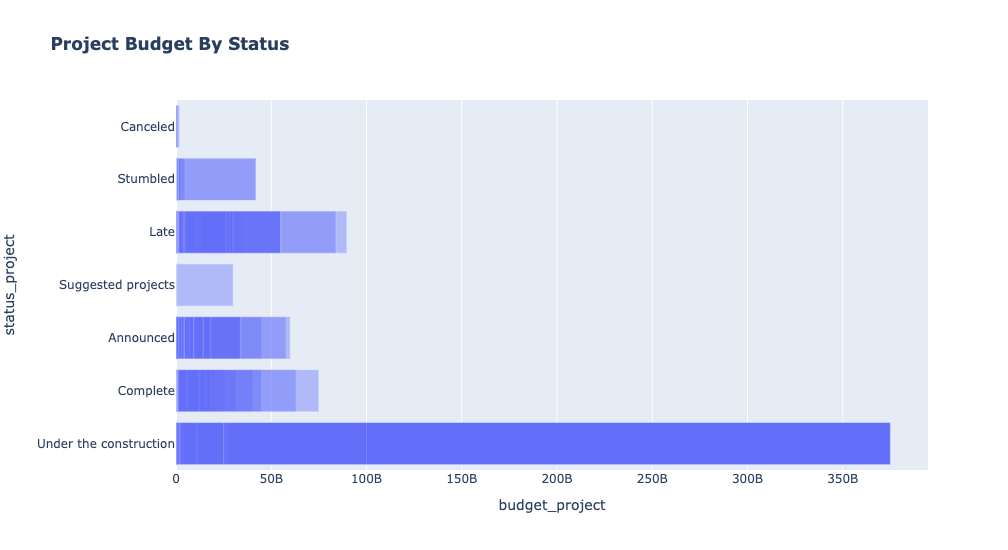

In [128]:
# 5- Interactive Plot (BarChart) shows Project Budget By Status 

barchart = px.bar(
    data_frame=df,
    x="budget_project",
    y="status_project",
    opacity=0.4,
    orientation="h",
    width=1300, height=550,
    title='<b>Project Budget By Status</b>',
    barmode='overlay'
)
barchart.show()

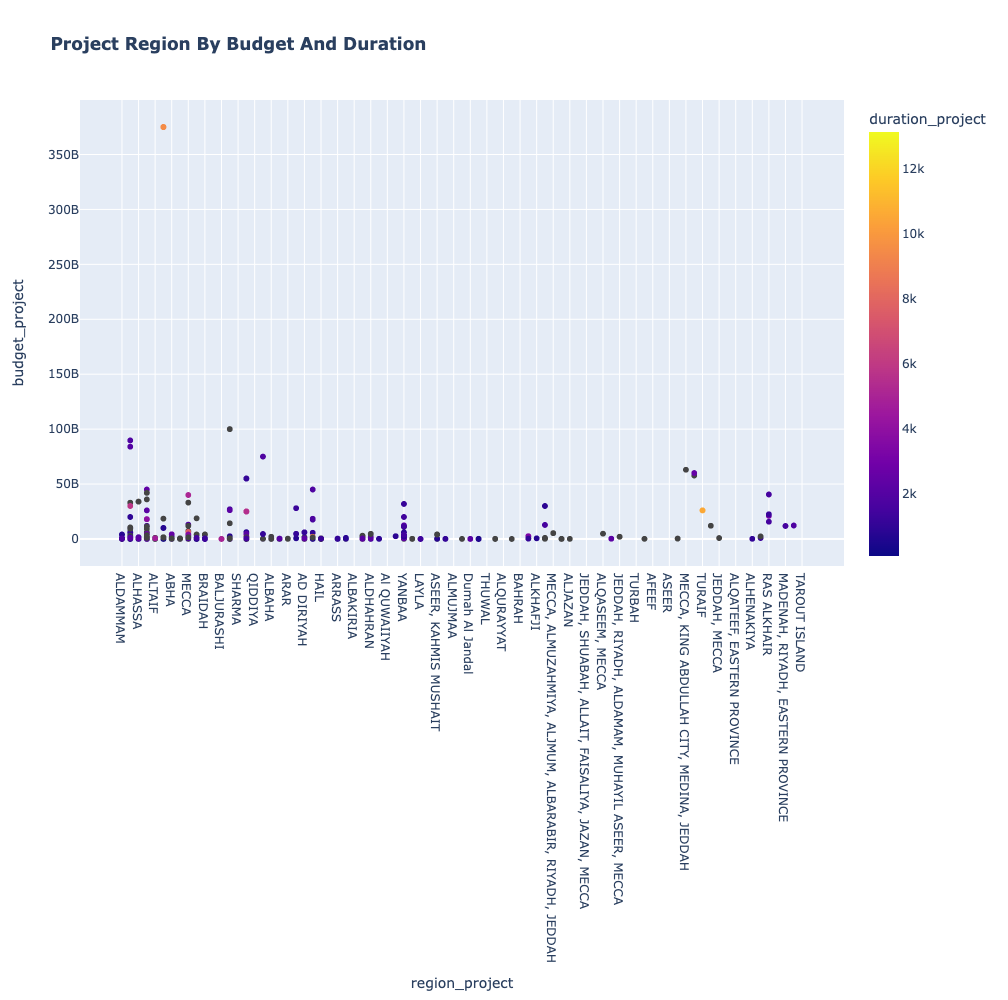

In [158]:
# 6- Interactive Plot (Scatter) shows the Project Budget By Region And Duration

px.scatter(
    data_frame = df, # data
    x = "region_project", # x value
    y = "budget_project", # y value 
    width=1100, height=1000,
    color ='duration_project',
    title = "<b>Project Region By Budget And Duration</b>"
    )